# 1. Title
## Indonesia Credit Data
### Sinarmas Land
---

# 2. Introduction
#### Name : Abdurrahman Shiddiq Thaha

A well organized and inquisitive Data Scientist/Analyst with a Bachelor Degree in Industrial Engineering who is keen to
explore new opportunities and broaden his knowledge. Experienced in analyzing numerous kinds of data into
insights and models. In addition, has the ability to effectively work in a team and independently.

# 3. External Link

# 4. Working Area

## • Import Libraries 

These are libraries that are used in this assignment:

- pandas : Used to load and process data

- numpy : Used to do mathematical calculation necessary in the data analysis

- matplotlib : Used to visualize data

- seaborn : Used to do an alternative data visualization

- sklearn : Used to do machine learning procedure

- xgboost : used to perform modelling using XGBOOST model

- imblearn : used to do data imbalance handling

- scipy.stats : Used to do statistical calculation

- warnings : Used to ignore any warning

In [396]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator, FixedFormatter
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score, calinski_harabasz_score
import scipy.stats as st
from feature_engine.outliers import Winsorizer

import warnings

warnings.simplefilter('ignore')

# enable inline plotting
%matplotlib inline

sns.set_style(style='white')

# set the max columns to none
pd.set_option('display.max_columns', None)

## • Data Loading 

We have been provided with 1 dataset . The description for what the dataset contain is given below: 


1. **Indonesia Credit Data** : This data provides information about indonesia credit data

### - Data Description

**Inpatient Data** and **outpatient Data**

| Variable | Definition | Description |
| --- | --- | --- |
| Age | The age of borrower | numeric |
| Sex | The sex of borrower  | text: male or female |
| Job  | The job of borrower | numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled |
| Housing | homeownership of borrower | text: own, rent or free |
| Saving accounts | Saving accounts status of borrower | text: little moderate, quite rich, rich |
| Checking account | The amount of checking account of borrower | numeric in DM - IDR |
| Credit amount | The amount of credit account of borrower | numeric in IDR |
| Duration | The duration of the credit | numeric in month |
| Purpose | The purpose of the credit | text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others |
| Risk  | Value target |Good or Bad Risk |





In [397]:
# Loading data
df = pd.read_csv('IndonesiaCreditData.csv', sep=';', index_col='No')

In [398]:
# Duplicate Dataset
df_copy = df.copy()

In [399]:
# Checking the shape of the dataset
df.shape

(1000, 9)

This dataset has 1000 rows and 9 columns

In [400]:
# Look at the first 3 rows
df_copy.head(3)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
No,,,,,,,,,
0,67,male,2,own,NaN,little,14494431,6,radio/TV
1,22,female,2,own,little,moderate,73786449,48,radio/TV
2,49,male,1,own,little,NaN,25988304,12,education


In [401]:
# Look at the last 3 rows
df_copy.tail(3)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
No,,,,,,,,,
997,38,male,2,own,little,NaN,9968796,12,radio/TV
998,23,male,2,free,little,little,22876155,45,radio/TV
999,27,male,2,own,moderate,moderate,56737824,45,car


In [402]:
# Show concise summary of the data
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 78.1+ KB


- there is 2 column that has null values (`Saving accounts` and `Checking accounts`)
- there are 5 columns with object datatype and 4 columns with int64 datatype

### • Change value of columns

sex: 0: female 1:male

In [403]:
df_copy['Sex'].replace({'female': 0, 'male': 1}, inplace=True)

### - Convert NaN to 'None'

In [404]:
df_copy['Saving accounts'].fillna('none', inplace=True)
df_copy['Checking account'].fillna('none', inplace=True)
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   int64 
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   1000 non-null   object
 5   Checking account  1000 non-null   object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(5), object(4)
memory usage: 78.1+ KB


Reasoning : We will asume that 'Nan' values in both 'Saving accounts' and 'Checking account' means that person doesn't have those account

### - Checking for duplicate

In [405]:
# Checking if the dataset have duplicate
df_copy.shape[0] - df_copy.drop_duplicates().shape[0]

0

There is not duplicate data

### - Statistical Overview of the data

In [406]:
# Generate some descriptive statistics of numerical data
df_copy.describe()

,Age,Sex,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000
mean,35.546000,0.690000,1.904000,4.056033e+07,20.903000
std,11.375469,0.462725,0.653614,3.499911e+07,12.058814
min,19.000000,0.000000,0.000000,3.099750e+06,4.000000
25%,27.000000,0.000000,2.000000,1.693083e+07,12.000000
50%,33.000000,1.000000,2.000000,2.875948e+07,18.000000
75%,42.000000,1.000000,2.000000,4.925193e+07,24.000000
max,75.000000,1.000000,3.000000,2.284392e+08,72.000000


We can see above, it seems there in no anomaly at all.

In [407]:
df_copy.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
No,,,,,,,,,
0,67,1,2,own,none,little,14494431,6,radio/TV
1,22,0,2,own,little,moderate,73786449,48,radio/TV
2,49,1,1,own,little,none,25988304,12,education
3,45,1,2,free,little,little,97728918,42,furniture/equipment
4,53,1,2,free,little,little,60383130,24,car


## • Exploratory Data Analysis (EDA)

## Univariate

There are 2 datatypes in the dataset:

1. Numerical: `Age`, `Credit amount`, `Duration`

2. Categorical: `Sex`, `Job`, `Housing`, `Saving accounts	`, `Checking account`, `Purpose`

For each datatype, we will do different data exploration

### - Numerical

For numerical data type, we will see the distribution of each column


Numerical: `age`, `credit amount`, `duration`

In [408]:
# defining a function to plot the distribution of data
def plot_numerical(df, feature, length=16, width=14):
    fig, axes = plt.subplots(len(feature), 2, figsize=(length, width))
    for c, ax in zip(feature, axes):
        skew = df[c].skew()
        
        _ = sns.histplot(x=df[c], ax=ax[0], bins='auto')
        ax[0].set_title(f'Distribution of {c} (skewness = {skew:.3f})')
        
        
        _ = sns.boxplot(x=df[c], ax=ax[1])
        ax[1].set_title(f'''Boxplot of {c}''')
        sns.despine()
        
    plt.tight_layout()
    
# defining a function to plot the correlation of features and target
def plot_heatmap(df, feature, target):
    plt.figure(figsize=(10,6))
    
    _ = sns.heatmap(df[feature + [target]].corr(), annot=True, annot_kws={"fontsize":13});
    _.set_title(f'Correlation heatmap')

In [409]:
num_col = ['Age', 'Credit amount', 'Duration']

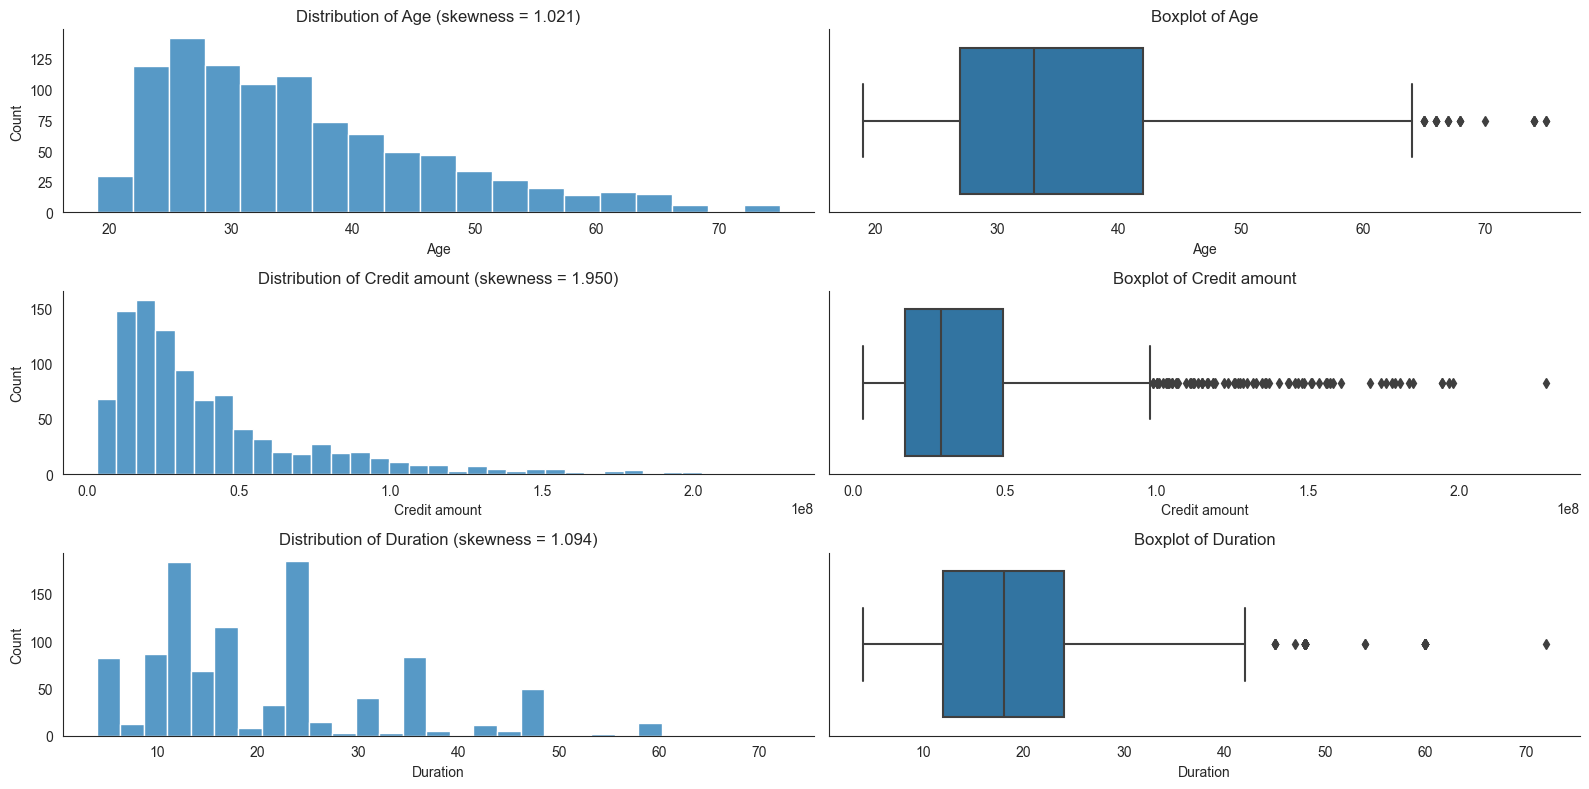

In [410]:
plot_numerical(df_copy, num_col, width=8)

From the visualization above, it seems that `Age` and `Credit amount` are the features that have a somewhat normal distribution with a right skewness, on the other hand, `Duration` doesn't look like to have any distribution

### - Categorical

Categorical Columns: `Sex`, `Job`, `Housing`, `Saving accounts`, `Checking account`, `Purpose`

In [411]:
cat_col = ['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']

In [412]:
# create a function to only show the label when it's > 5%
def autopct(pct): 
    return ('%1.1f%%' % pct) if pct > 5 else ''

# defining a function to plot a pie chart
def pie_chart(df, feature):
    fig, axes = plt.subplots(2, 3, figsize=(16,14))

    # flat the axes to be in one line of list
    axes = axes.flatten()
    
    # Use for loop to plot all of the categorical data into pie chart
    for c, ax in zip(feature, axes):
        n_cat = df[c].nunique()
        _ = df[c].value_counts().sort_values(ascending=False).plot(kind='pie', fontsize=10, autopct=autopct, ax=ax, title=f'{c} ({n_cat} categories)');
        _ = ax.set_ylabel('')
    _ = plt.tight_layout()

    

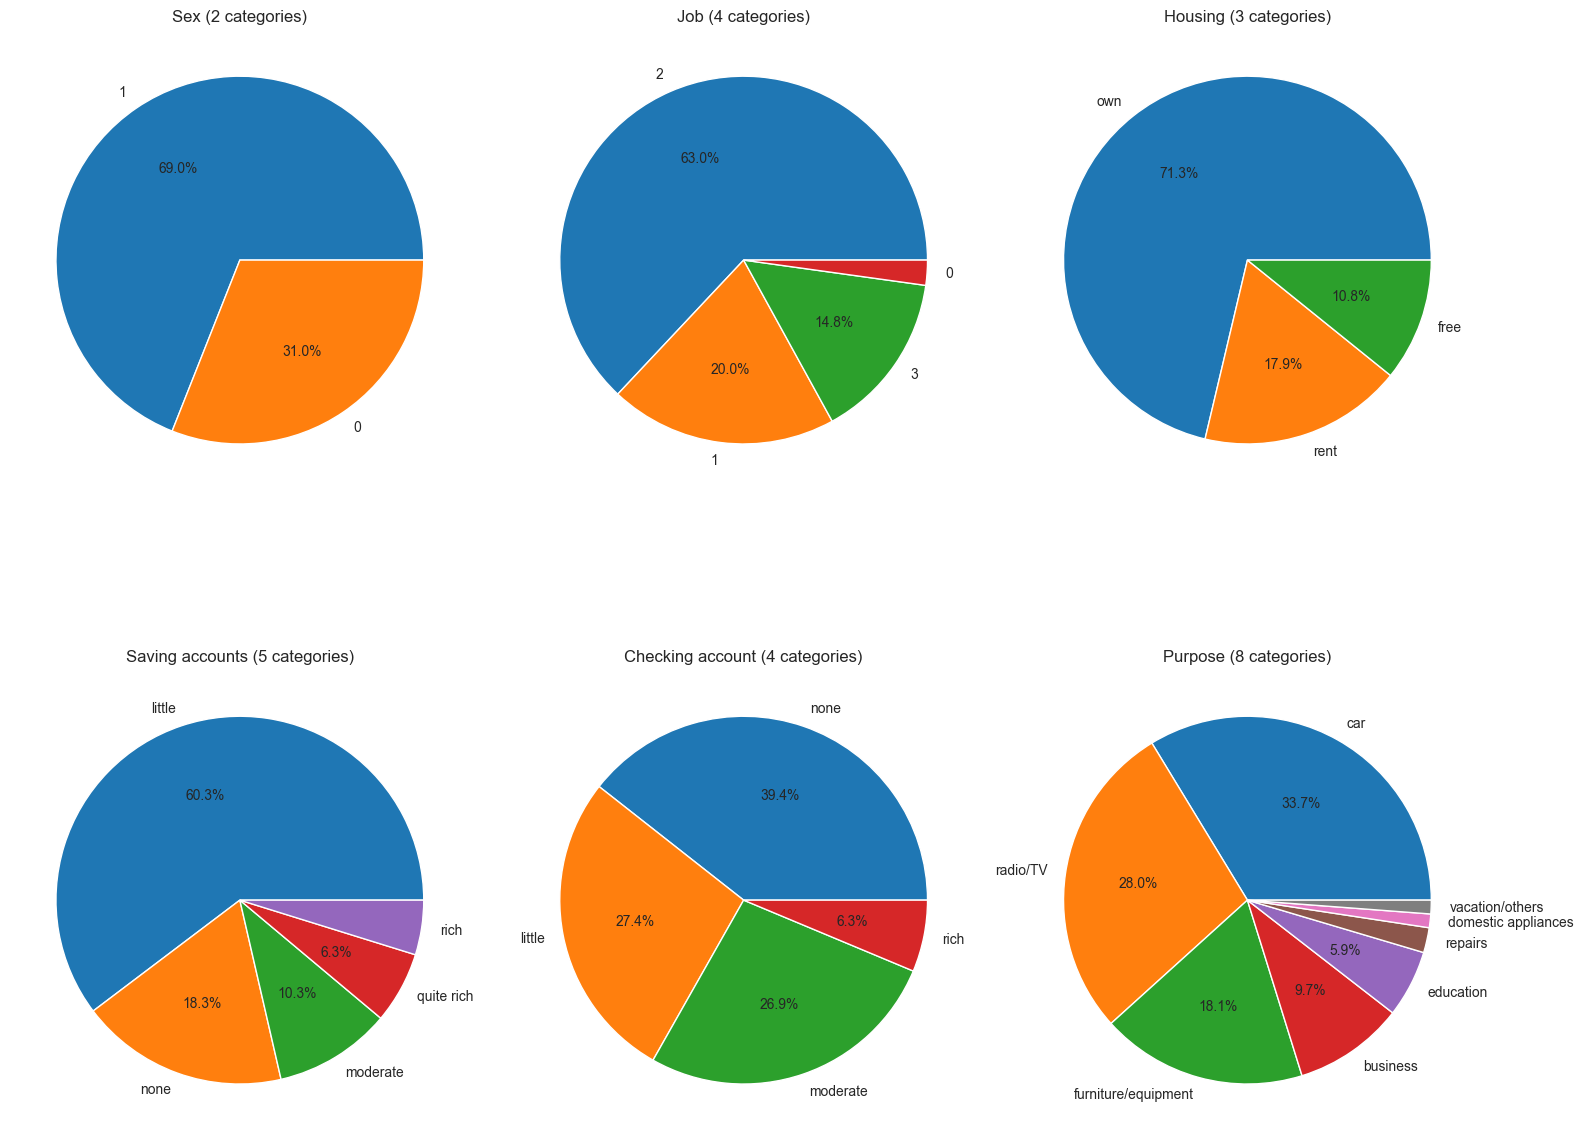

In [413]:
pie_chart(df_copy, cat_col)

As can be seen above, The majority of borrower is male, the majority of the job is skilled job, the majority of the borrower owns house, and then the majority also have a little saving accounts.

## Bivariate

What is the distribution of sex and the amount of credit?

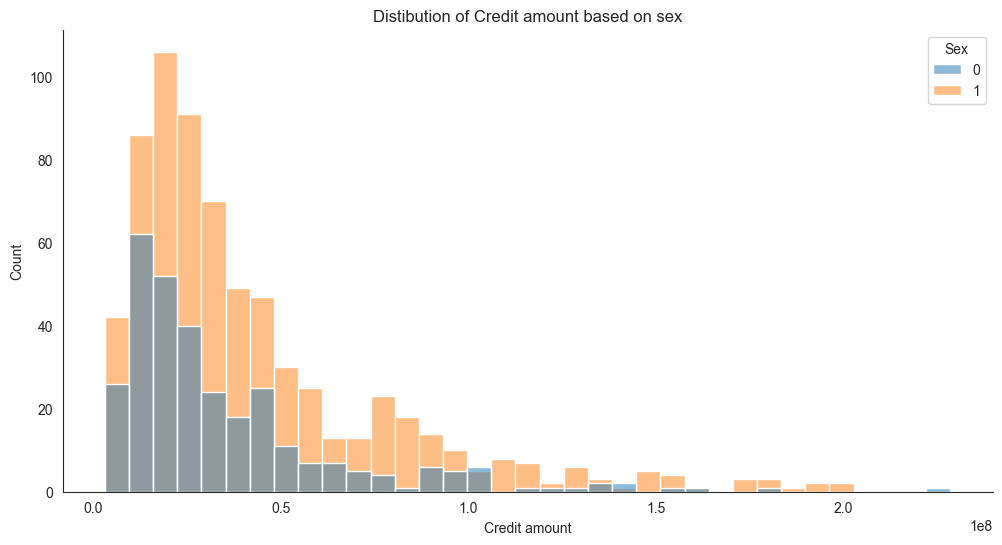

In [414]:
fig, ax = plt.subplots(1, 1, figsize=(12,6))


_ = sns.histplot(x=df_copy['Credit amount'], ax=ax, bins='auto', hue=df_copy['Sex'])
_.set_title(f'Distibution of Credit amount based on sex');
sns.despine()
    

What is the distribution of purpose and the amount of credit?

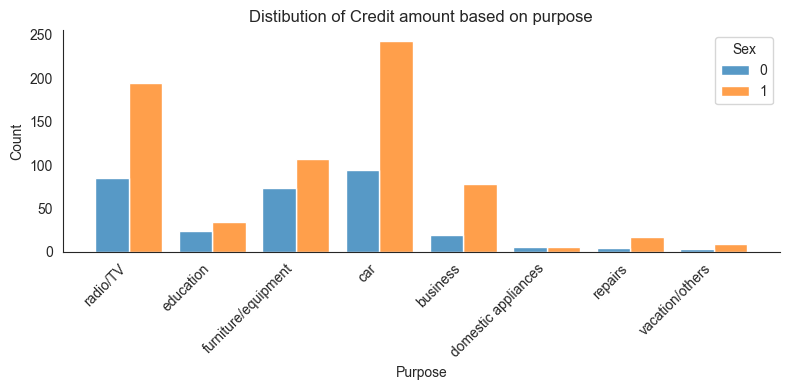

In [415]:
fig, ax = plt.subplots(1, 1, figsize=(8,4))
_ = sns.histplot(df_copy, x='Purpose', hue='Sex', multiple='dodge', shrink=0.8, ax=ax)

_.set_title(f'Distibution of Credit amount based on purpose')
plt.xticks(rotation=45, ha='right');
sns.despine()
plt.tight_layout()

What is the distribution of purpose and the amount of credit?

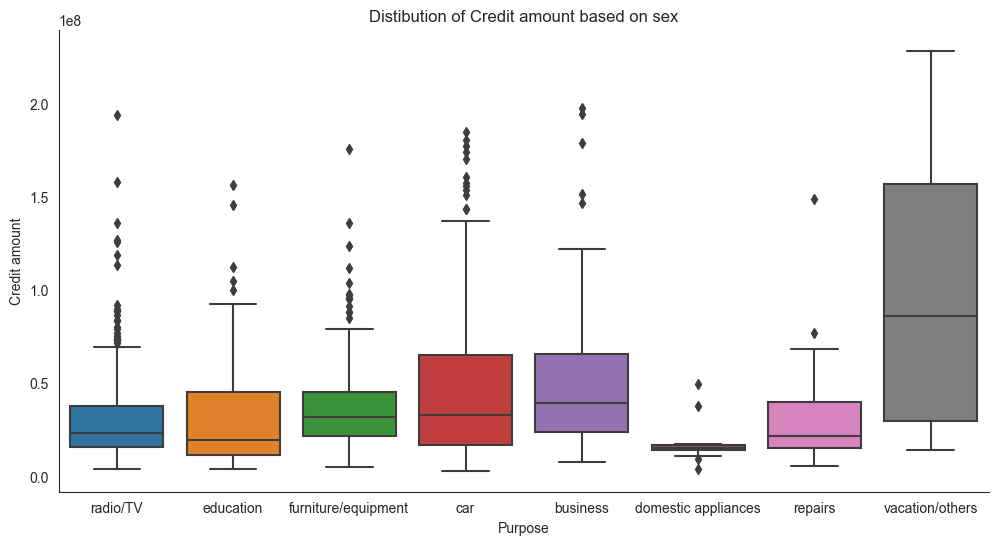

In [416]:
fig, ax = plt.subplots(1, 1, figsize=(12,6))


_ = sns.boxplot(y=df_copy['Credit amount'], ax=ax, x=df_copy['Purpose'])
_.set_title(f'Distibution of Credit amount based on sex');
sns.despine()
    

## 5. Data Preprocessing

### • Data for model inference

In [417]:
# Get Data for Model Inference
df_inf = df_copy.sample(5, random_state=420)
df_inf.head(3)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
No,,,,,,,,,
715,63,1,2,own,none,none,94182804,30,car
353,28,1,2,rent,little,little,76861401,12,radio/TV
507,34,1,3,own,moderate,moderate,84933150,15,car


In [418]:
# Remove Inference-Set from Dataset
train_selected = df_copy.drop(df_inf.index)
train_selected.shape

(995, 9)

In [419]:
# Reset Index 
train_selected.reset_index(drop=True, inplace=True) 
df_inf.reset_index(drop=True, inplace=True)

### • Handling outliers

In [420]:
# winsorizer
winsorizer = Winsorizer(capping_method='iqr',
                          tail='right', 
                          fold=1.5,
                          variables=num_col)

winsorizer.fit(train_selected)

df_win = winsorizer.transform(train_selected)                      

In [421]:
df_win.shape

(995, 9)

After outliers handling, we are left with 1000 rows and 18 columns

### • Handling missing values

In [422]:
def mis_val_identifier(df):
    temp = df.isnull().sum()/df.shape[0]
    return temp.loc[temp != 0]

In [423]:
# Finding missing values in train
mis_val_identifier(df_win)

Series([], dtype: float64)

There is no missing values in data train

### • Feature encoding

In [424]:
df_win.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,64.5,1,2,own,none,little,14494431.00,6.0,radio/TV
1,22.0,0,2,own,little,moderate,73786449.00,42.0,radio/TV
2,49.0,1,1,own,little,none,25988304.00,12.0,education
3,45.0,1,2,free,little,little,97533633.75,42.0,furniture/equipment
4,53.0,1,2,free,little,little,60383130.00,24.0,car


In [425]:
df_win['Checking account'].unique()

array(['little', 'moderate', 'none', 'rich'], dtype=object)

In [426]:
# manual encoder to encode the ordinal categorical data

df_win['Saving accounts'].replace({'none': 0,
                                   'little': 1,
                                   'moderate': 2,
                                   'quite rich': 3,
                                   'rich': 4
                                   }, inplace=True)

df_win['Checking account'].replace({'none': 0,
                                   'little': 1,
                                   'moderate': 2,
                                   'rich': 3
                                   }, inplace=True)

In [427]:
df_win.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,64.5,1,2,own,0,1,14494431.00,6.0,radio/TV
1,22.0,0,2,own,1,2,73786449.00,42.0,radio/TV
2,49.0,1,1,own,1,0,25988304.00,12.0,education
3,45.0,1,2,free,1,1,97533633.75,42.0,furniture/equipment
4,53.0,1,2,free,1,1,60383130.00,24.0,car


In [428]:
# using one hot encoder to encode the nominal categorical data

encoder_ohe = OneHotEncoder(handle_unknown='ignore').fit(df_win[['Housing', 'Purpose']])


X_train_encoded_nom = pd.DataFrame(encoder_ohe.transform(df_win[['Housing', 'Purpose']]).toarray())
X_train_encoded_nom

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
990,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
991,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
992,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
993,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### • Feature scaling

In [429]:
# finding the suitable scaling method for feature scaling
norm = 0
nonorm = 0
for col in df_win[num_col]:
    if df_win[col].skew() >=-0.5 and df_win[col].skew() <0.5:
        norm += 1
    else:
        nonorm +=1
        
    if norm > nonorm:
        scaler = StandardScaler()
    else:
        scaler = MinMaxScaler()
scaler

MinMaxScaler()

We will use Standard Scaler to do feature scaling

In [430]:
# Feature scaling using StandardScaler Scaler

df_win[num_col] = scaler.fit_transform(df_win[num_col])
df_win.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,1.000000,1,2,own,0,1,0.120663,0.052632,radio/TV
1,0.065934,0,2,own,1,2,0.748531,1.000000,radio/TV
2,0.659341,1,1,own,1,0,0.242376,0.210526,education
3,0.571429,1,2,free,1,1,1.000000,1.000000,furniture/equipment
4,0.747253,1,2,free,1,1,0.606598,0.526316,car


### • Concate between Numerical Columns and Categorical Columns

In [431]:
# Dropping the encoded column
df_win.drop(['Housing', 'Purpose'], axis=1, inplace=True)
df_win.head()

,Age,Sex,Job,Saving accounts,Checking account,Credit amount,Duration
0,1.000000,1,2,0,1,0.120663,0.052632
1,0.065934,0,2,1,2,0.748531,1.000000
2,0.659341,1,1,1,0,0.242376,0.210526
3,0.571429,1,2,1,1,1.000000,1.000000
4,0.747253,1,2,1,1,0.606598,0.526316


In [432]:
# Concate Columns

X_train_final = np.concatenate([df_win, X_train_encoded_nom], axis=1)
X_train_final

array([[1.        , 1.        , 2.        , ..., 1.        , 0.        ,
        0.        ],
       [0.06593407, 0.        , 2.        , ..., 1.        , 0.        ,
        0.        ],
       [0.65934066, 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.41758242, 1.        , 2.        , ..., 1.        , 0.        ,
        0.        ],
       [0.08791209, 1.        , 2.        , ..., 1.        , 0.        ,
        0.        ],
       [0.17582418, 1.        , 2.        , ..., 0.        , 0.        ,
        0.        ]])

In [433]:
### • Principal Components Analysis (PCA)
# Create DataFrame of `X_train_final` and `X_test_final_df`
pca_begin = PCA(random_state=420)
pca_begin.fit(X_train_final)
cumsum = np.cumsum(pca_begin.explained_variance_ratio_)

In [434]:
cumsum

array([0.24017503, 0.47453638, 0.58925587, 0.67989242, 0.75573504,
       0.8110109 , 0.86149738, 0.89531105, 0.92645652, 0.95169594,
       0.96756465, 0.97987286, 0.98664099, 0.99329492, 0.99703044,
       1.        , 1.        , 1.        ])

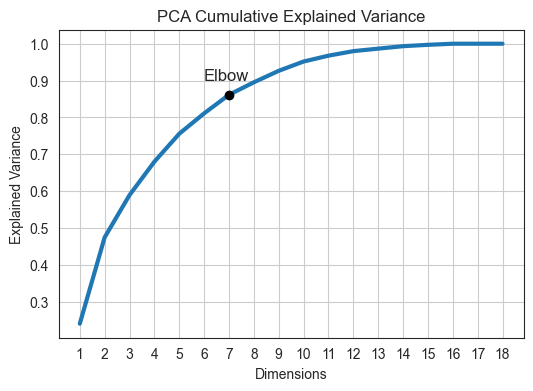

In [435]:
plt.figure(figsize=(6,4))
sns.lineplot(x=range(1, pca_begin.n_components_ + 1), y=cumsum, linewidth=3)
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.xticks(range(pca_begin.n_components_ + 1))
plt.plot(7, 0.861, "ko")
plt.annotate("Elbow", xy=(8, 0.82), xytext=(6, 0.9), fontsize=12)
plt.grid(True)
plt.title('PCA Cumulative Explained Variance')
plt.show()

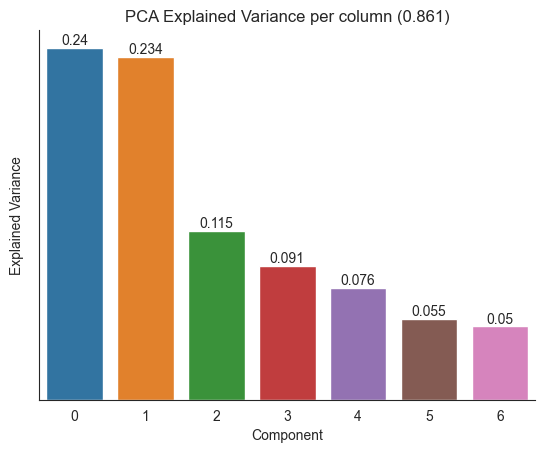

In [436]:
pca = PCA(n_components = 7)
train_reduced = pca.fit_transform(X_train_final)

_ = sns.barplot(x=list(range(0,7)), y=list(np.round(pca.explained_variance_ratio_, 3)))
_.bar_label(_.containers[0]);
_.set(yticklabels=[])
_.set_xlabel("Component")
_.set_ylabel("Explained Variance")
_.set_title(f'PCA Explained Variance per column ({np.sum(pca.explained_variance_ratio_):.3f})')
sns.despine()



After being handled, we get a total of 6556 instances of data with a 50:50 proportion

## 6. Model Definition

The algorithms that will be used are 

### • K-Means

We will use K-means Algorithm to do clustering with this specification:

- n-clutser = 1-9
- random_state = 420
- Others = Default

In [437]:
n_kmeans = range(1,10)

### • Agglomerative Clustering

We will use Agglomerative Clustering Model to do clustering with this specification:

- n-clutser = 1-9
- random_state = 420
- Others = Default

In [438]:
n_agglo = range(1,9)

### • Gaussian Mixture

We will use Gaussian Mixture Model to do clustering with this specification:

- n-clutser = 1-9
- random_state = 420
- n_init = 10
- Others = Default

In [439]:
n_gmm = range(1,10)

## 7. Model Training


We will fit the model into the train data that has been preprocessed

### • K-Means

In [440]:
# Train the Model using list comprehension
kmeans_per_k = [KMeans(n_clusters=k, random_state=420).fit(train_reduced)
                for k in n_kmeans]


### • Agglomerative Clustering

In [441]:
# Train the Model using list comprehension
agglo_per_k = [AgglomerativeClustering(n_clusters=k).fit(train_reduced)
                for k in n_agglo]


### • GMM

In [442]:
# Train the Model using list comprehension
gmm_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=420).fit(train_reduced) 
             for k in n_gmm]

## 8. Model Evaluation

### • K-Means

#### Elbow Method


In [443]:
inertias = [model.inertia_ for model in kmeans_per_k]

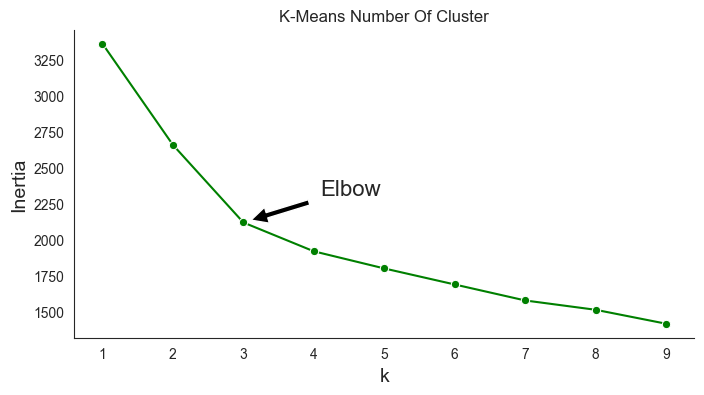

In [444]:
plt.figure(figsize=(8, 4))
_ = sns.lineplot(x=range(1, 10), y=inertias, marker="o", color='green')
_.set_xlabel("k", fontsize=14)
_.set_ylabel("Inertia", fontsize=14)
_.set_title('K-Means Number Of Cluster')
plt.annotate('Elbow',
             xy=(3, inertias[2]),
             xytext=(0.4, 0.5),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
sns.despine()

#### Silhouette Score

In [445]:
silhouette_scores_kmeans = [silhouette_score(train_reduced, model.labels_)
                     for model in kmeans_per_k[1:]]

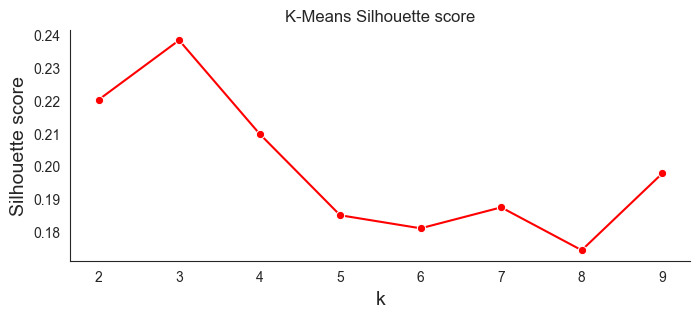

In [446]:
plt.figure(figsize=(8, 3))
_ = sns.lineplot(x=n_kmeans[1:], y=silhouette_scores_kmeans, marker="o", color='red')
_.set_xlabel("k", fontsize=14)
_.set_ylabel("Silhouette score", fontsize=14)
_.set_title('K-Means Silhouette score')
sns.despine()

### • Agglomerative Clustering

In [447]:
silhouette_scores_agglo = [silhouette_score(train_reduced, model.labels_)
                     for model in agglo_per_k[1:]]

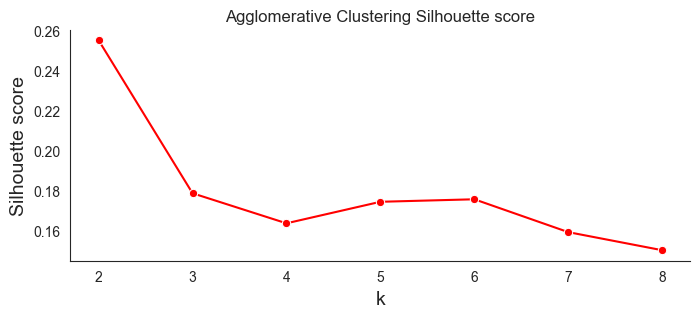

In [448]:
plt.figure(figsize=(8, 3))
_ = sns.lineplot(x=n_agglo[1:], y=silhouette_scores_agglo, marker="o", color='red')
_.set_xlabel("k", fontsize=14)
_.set_ylabel("Silhouette score", fontsize=14)
_.set_title('Agglomerative Clustering Silhouette score')
sns.despine()

### • Gaussian Mixture

In [449]:
# Get BIC and AIC Scores

bics = [model.bic(train_reduced) for model in gmm_per_k]
aics = [model.aic(train_reduced) for model in gmm_per_k]

In [450]:
for k in range(0, 9):
  print('Cluster : ', k+1, '\tBIC : ', bics[k], '\tAIC : ', aics[k])

Cluster :  1 	BIC :  13704.342527281951 	AIC :  13532.7465314814
Cluster :  2 	BIC :  10530.481276486367 	AIC :  10182.386542148108
Cluster :  3 	BIC :  9438.931245832697 	AIC :  8914.337772956727
Cluster :  4 	BIC :  7711.3906844953235 	AIC :  7010.298473081644
Cluster :  5 	BIC :  4710.375209389387 	AIC :  3832.7842594379995
Cluster :  6 	BIC :  1757.8402958011432 	AIC :  703.7506073120458
Cluster :  7 	BIC :  3555.7908896352824 	AIC :  2325.202462608476
Cluster :  8 	BIC :  1590.8761285633764 	AIC :  183.78896299886014
Cluster :  9 	BIC :  1546.3380928603237 	AIC :  -37.24781124190167


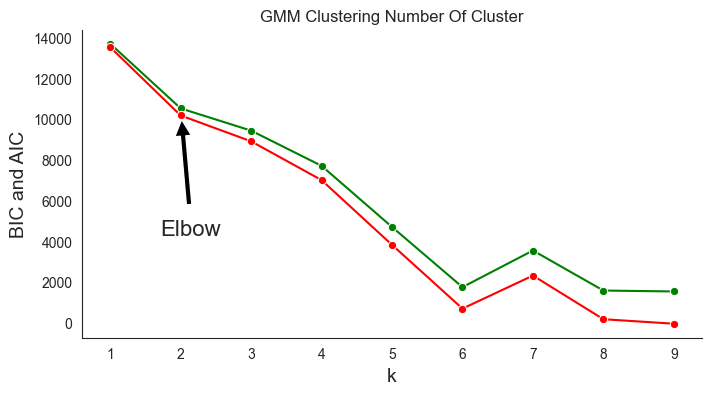

In [451]:
plt.figure(figsize=(8, 4))
_ = sns.lineplot(x=range(1, 10), y=bics, marker="o", color='green')
_ = sns.lineplot(x=range(1, 10), y=aics, marker="o", color='red')
_.set_xlabel("k", fontsize=14)
_.set_ylabel("BIC and AIC", fontsize=14)
_.set_title('GMM Clustering Number Of Cluster')
plt.annotate('Elbow',
             xy=(2, bics[1]),
             xytext=(0.2, 0.4),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
sns.despine()

### • Choose the best model

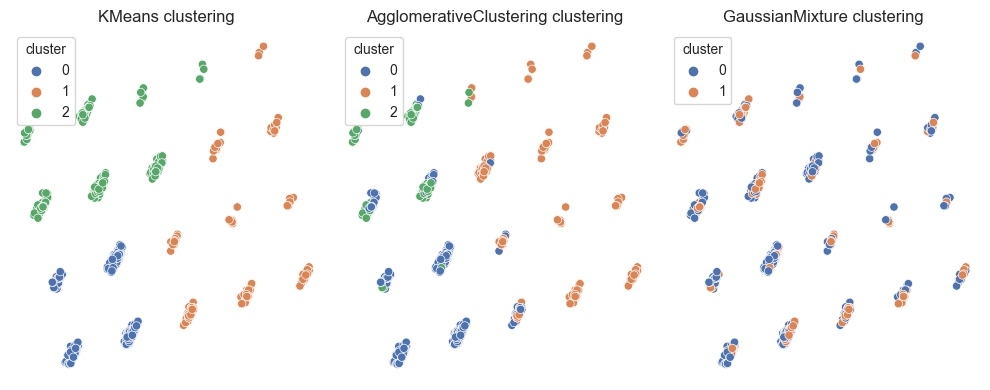

In [452]:
fig, axes = plt.subplots(1, 3, figsize=(10,4))

for n, model in enumerate([kmeans_per_k[2], agglo_per_k[2], gmm_per_k[1]]):
    name = (f'{model}').split('(')[0]
    y_pred = model.fit_predict(train_reduced)

    df_temp = pd.DataFrame(train_reduced)
    df_temp['cluster'] = y_pred
    df_temp
    _ = sns.scatterplot(data=df_temp, x=0, y=1, hue='cluster', ax=axes[n], palette='deep')
    _.set_title(f'{name} clustering')
    _.set(yticklabels=[], xticklabels=[], ylabel='', xlabel='')
    sns.despine(bottom = True, left = True)
    plt.tight_layout()


## 10. Model Exploratory Data Analysis

In [453]:
df_eda = train_selected.copy()
y_pred = kmeans_per_k[2].fit_predict(train_reduced)
df_eda['CLUSTER'] = y_pred
df_eda.head(3)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,CLUSTER
0,67,1,2,own,none,little,14494431,6,radio/TV,0
1,22,0,2,own,little,moderate,73786449,48,radio/TV,2
2,49,1,1,own,little,none,25988304,12,education,0


In [454]:
# define a function to visualize target distribution
def target_dist(df, target):
    plt.figure(figsize=(7,5))

    _ = sns.countplot(x=df[target])
    _.bar_label(_.containers[0]);
    xtick = []

    for i in range(3):
        xtick.append(df[target].value_counts()[i]*100 / df.shape[0])

    _.set_xticklabels([f'0 ({xtick[0]:.2f}%)', f'1 ({xtick[1]:.2f}%)', f'2 ({xtick[2]:.2f}%)']);
    _.set_title(f'Cluster Distribution')
    _.grid(False)
    sns.despine()

    plt.tight_layout;

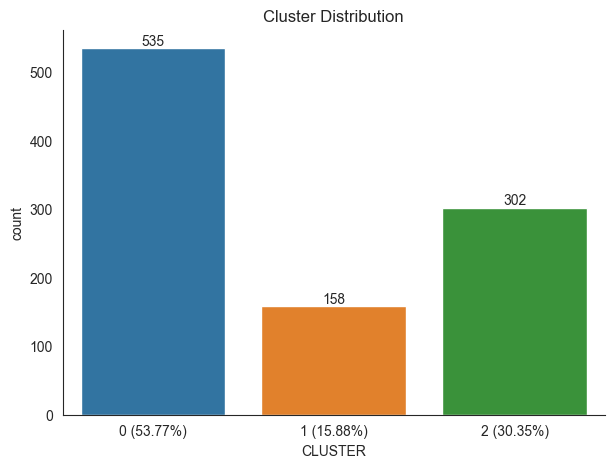

In [455]:
target_dist(df_eda, 'CLUSTER')

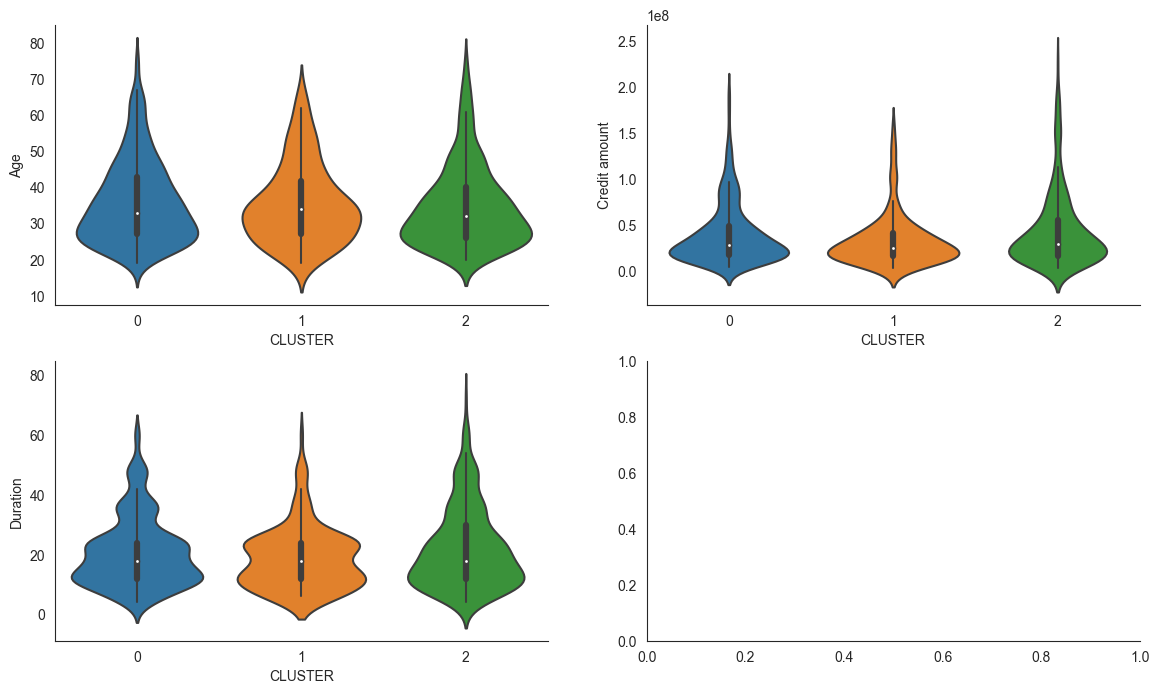

In [456]:
fig, axes = plt.subplots(2, 2, figsize=(14,8))

axes = axes.flatten()

for ax, col in zip(axes, num_col):
    _ = sns.violinplot(x=df_eda["CLUSTER"], y=df_eda[col], ax=ax)
    sns.despine()

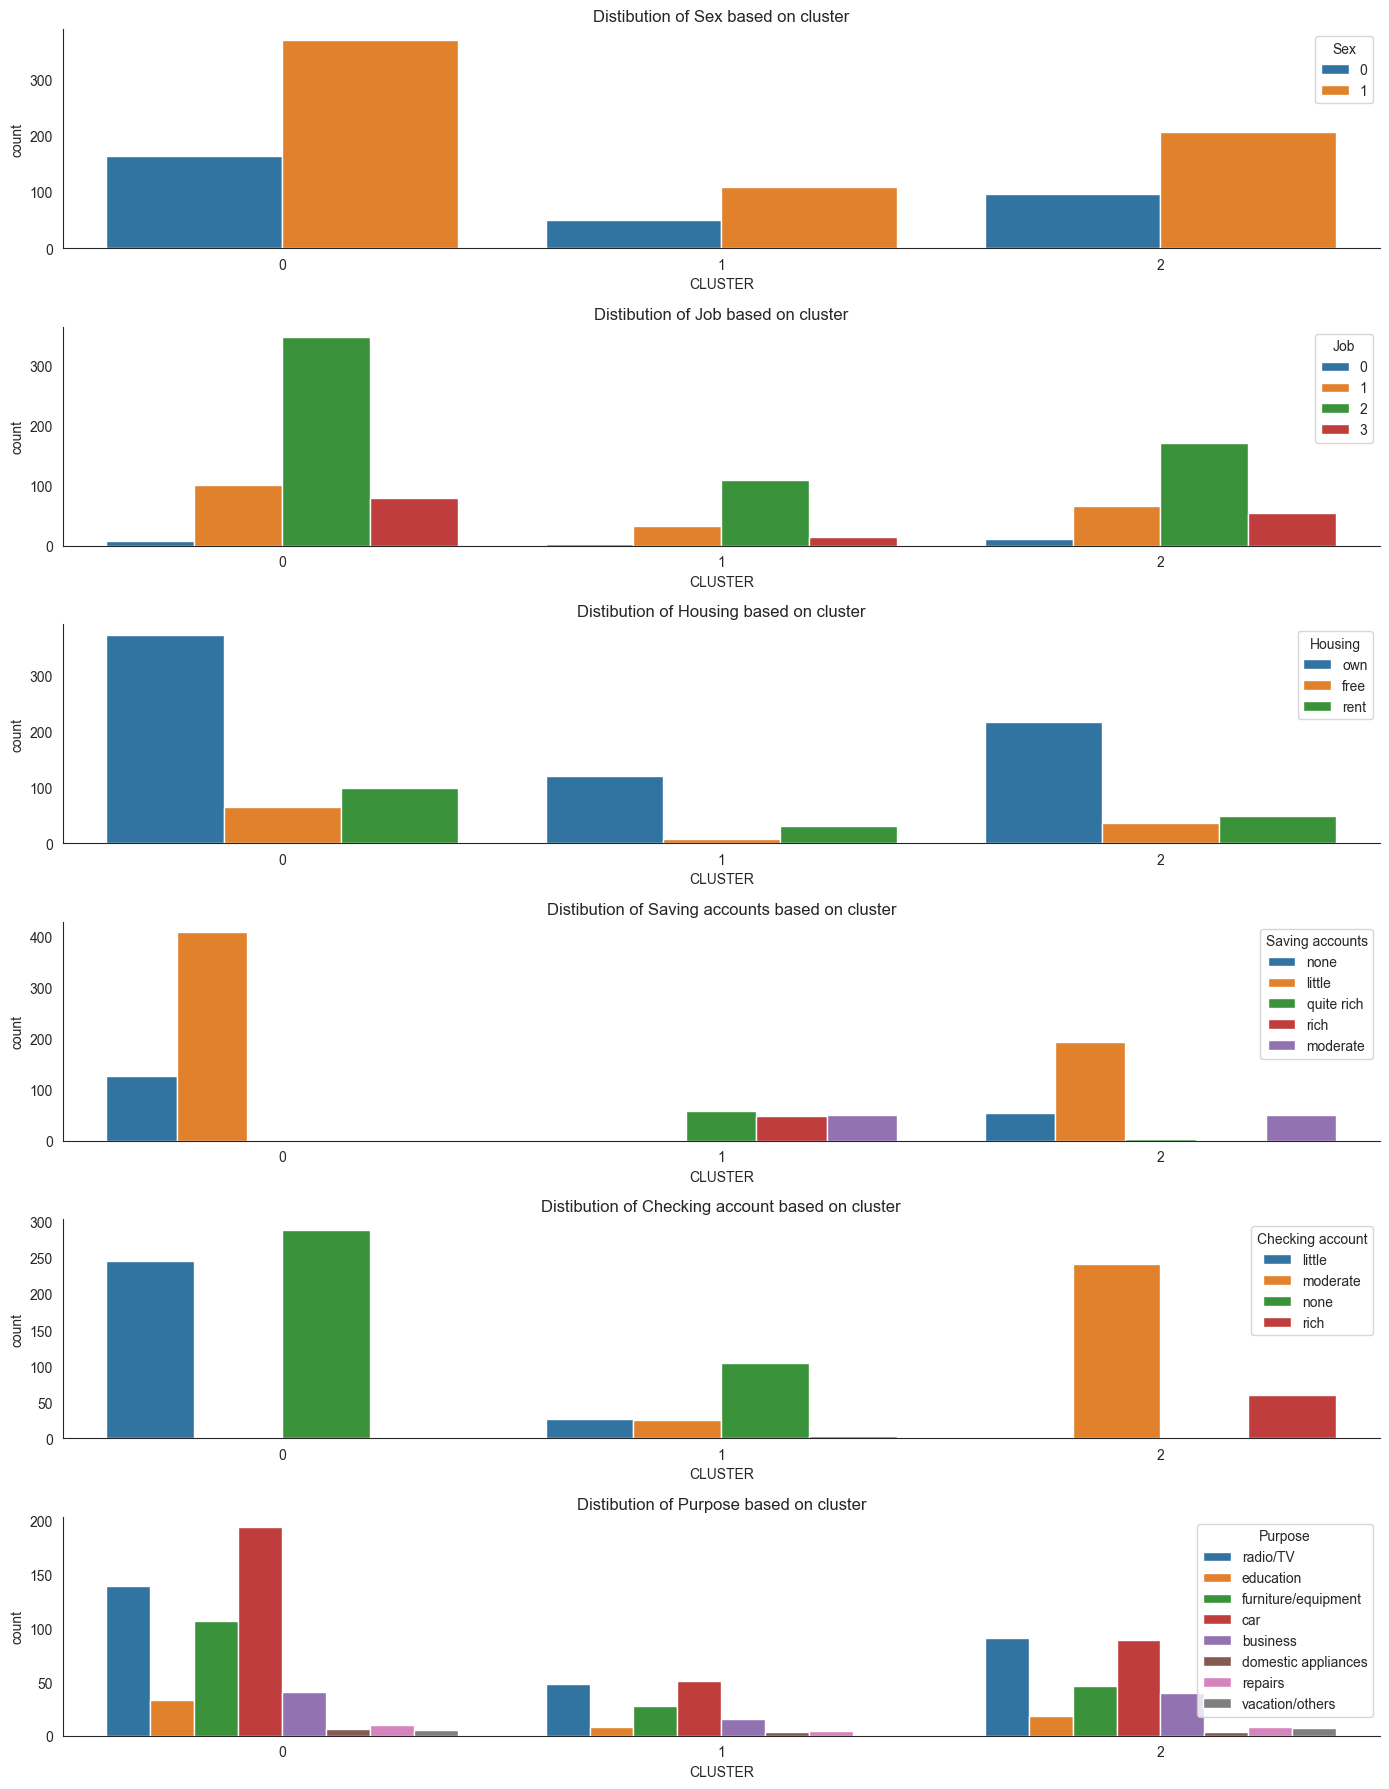

In [457]:
fig, axes = plt.subplots(6, 1, figsize=(14,18))

for ax, col in zip(axes, cat_col):
    _ = sns.countplot(df_eda, x='CLUSTER', hue=col, ax=ax, palette='tab10')
    _.set_title(f'Distibution of {col} based on cluster')
    sns.despine()
    plt.tight_layout()

## 11. Model Inference

In [ ]:
df_inf.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,63,1,2,own,none,none,94182804,30,car
1,28,1,2,rent,little,little,76861401,12,radio/TV
2,34,1,3,own,moderate,moderate,84933150,15,car
3,25,1,1,own,little,little,14110062,9,radio/TV
4,27,1,2,own,moderate,moderate,24736005,12,car


In [459]:
# Feature scaling
data_inf_scaled = scaler.transform(df_inf[num_col])
df_inf[num_col] = data_inf_scaled
df_inf

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0.967033,1,2,own,none,none,0.964517,0.684211,car
1,0.197802,1,2,rent,little,little,0.781093,0.210526,radio/TV
2,0.329670,1,3,own,moderate,moderate,0.866568,0.289474,car
3,0.131868,1,1,own,little,little,0.116593,0.131579,radio/TV
4,0.175824,1,2,own,moderate,moderate,0.229115,0.210526,car


In [460]:
# manual encoder to encode the ordinal categorical data

df_inf['Saving accounts'].replace({'none': 0,
                                   'little': 1,
                                   'moderate': 2,
                                   'quite rich': 3,
                                   'rich': 4
                                   }, inplace=True)

df_inf['Checking account'].replace({'none': 0,
                                   'little': 1,
                                   'moderate': 2,
                                   'rich': 3
                                   }, inplace=True)

In [461]:
inf_encoded_nom = pd.DataFrame(encoder_ohe.transform(df_inf[['Housing', 'Purpose']]).toarray())
inf_encoded_nom

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [462]:
df_inf.drop(['Housing', 'Purpose'], axis=1, inplace=True)
df_inf.head()

,Age,Sex,Job,Saving accounts,Checking account,Credit amount,Duration
0,0.967033,1,2,0,0,0.964517,0.684211
1,0.197802,1,2,1,1,0.781093,0.210526
2,0.329670,1,3,2,2,0.866568,0.289474
3,0.131868,1,1,1,1,0.116593,0.131579
4,0.175824,1,2,2,2,0.229115,0.210526


In [464]:
# Concate Columns

df_inf_final = np.concatenate([df_inf, inf_encoded_nom], axis=1)
df_inf_final

array([[0.96703297, 1.        , 2.        , 0.        , 0.        ,
        0.96451666, 0.68421053, 0.        , 1.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.1978022 , 1.        , 2.        , 1.        , 1.        ,
        0.78109306, 0.21052632, 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        ],
       [0.32967033, 1.        , 3.        , 2.        , 2.        ,
        0.86656819, 0.28947368, 0.        , 1.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.13186813, 1.        , 1.        , 1.        , 1.        ,
        0.11659281, 0.13157895, 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        ],
    

In [466]:
inf_reduced = pca.transform(df_inf_final)

In [467]:
# predicting the target using logistic Regression model
inf_pred = kmeans_per_k[2].predict(inf_reduced)

In [468]:
# make a dataframe from the prediction
df_inf['CLUSTER'] = inf_pred
df_inf

,Age,Sex,Job,Saving accounts,Checking account,Credit amount,Duration,CLUSTER
0,0.967033,1,2,0,0,0.964517,0.684211,0
1,0.197802,1,2,1,1,0.781093,0.210526,0
2,0.329670,1,3,2,2,0.866568,0.289474,2
3,0.131868,1,1,1,1,0.116593,0.131579,0
4,0.175824,1,2,2,2,0.229115,0.210526,2


We were succeeded to do model inference

# 5. Conclusion 

To start with, knowing our goal is the basic thing to do. The goal of this project is Please predict Risk based on parameter conditions. Beside that, being aware of the data that we are working with is also a must. Our data contains information about  about indonesia credit data including the age, account, housing, credit amount, duration and purpose of the borrower.

Thereafter, answering our goal. we tried to do segmentation with 3 different algorithms, namely K-Means, Agglomerative clustering and Gaussian Mixture.  Suprisingly all of the algorithms suggested that we should cluster our customer into 3 clusters except GMM, But at the end, we chose the clustering generated by K-means since it gave the best evaluation. Each of cluster that we have generated has their own characteristic, cluster 0 tends to have a lower saving account, cluster 1 seems to have higher saving account and checking account than the others, and cluster 2 is somewhere in the middle.

For the recape, we were able to generate 3 cluster to segment our costumers based on the borrower information with 3 different algorithms. But honestly speaking, we think that our model still lack in a lot of aspects, for example, a better usage of information, a better algorithm to cluster the data, a superior data preprocessing and additional information (e.g income, spending, etc).